## Breast Cancer Project test

By: Bima Arinto Nugroho

In this project, I will doing some calculation in Machine Learning about Breast Cancer. As you know, Breast Cancer is cancer that forms in the cells of the breasts. 
   
There are several other less common kinds of breast cancer, such as Paget's disease, medullary, mucinous, and inflamatory breast cancer.

I will calculate the accuracy from the Machine Learning model to predict if the tumor is Benign or Malignant

The dataset is from Breast cancer Wisconsin (https://www.kaggle.com/datasets/marshuu/breast-cancer) and Kaggle. All rights to the respective owner.

This dataset is perfect for logistic regression analysis.
Since the dataset is already cleaned (thanks to the respective owner), we don't have to do data cleaning part

### Nine attributes which can help us detect whether the tumor is benign or malignant*.
Clump Thickness*: This is used to assess if cells are mono-layered or multi-layered. Benign cells tend to be grouped in mono-layers, while cancerous cells are often grouped in multi-layer.
- Mono-layered*: A monolayer is a single, closely packed layer of cells in this case
- Multi-layered*: A multilayered are multiple layers of cells non-uniformed.
- Range 1 - 10: 1 is monolayer to 10 mulit-layed.
Uniformity of Cell Size*: It is used to evaluate the consistency in the size of cells in the sample.
- Cancer cells tend to vary in size. That is why this parameter is very valuable in determining whether the cells are cancerous or not.
- Range 1 - 10: 1 is uniformed to 10 non-uniformed.
Uniformity of Cell Shape*: It is used to estimate the equality of cell shapes.
- Identifies marginal variances because cancer cells tend to vary in shape.
- Range 1 - 10: 1 is uniformed to 10 is non-uniformed
Marginal Adhesion*: Normal cells tend to stick together. Cancer cells tend to loose this ability.
- So loss of adhesion is a sign of malignancy.
- Range 1 - 10: 1 adhesion to 10 nonadhesive
Single Epithelial Cell Size*: It is related to the uniformity.
- Epithelial cells that are significantly enlarged may be a malignant cell.
- Range 1 - 10: 1 smallest to 10 largest
Bare Nuclei*: This is a term used for nuclei that is not surrounded by cytoplasm.
Those are typically seen in benign tumor.
Cytoplasm is is the gelatinous liquid that fills the inside of a cell. It is composed of water, salts, and various organic molecules.
- Range 1 - 10: 1 no cytoplasm to 10 with cytoplasm
Bland Chromatin*: Describes a uniform texture of the nucleus seen in benign cell.
- In cancer cell, the chromatin tends to be coarser.
- Range 1 - 10: 1 is Chromatin smooth to 10 is Chromatin is coarse.
Normal Nucleoli*: Nucleoli are small structures seen in the nucleus.
- In normal cell the nucleolus is usually very small if visible at all.
- In cancer cell the nucleoli become much more prominent, and sometimes there are more of them.
- Range 1 - 10: 1 Normal Nucleoti stucture to 10 Nucleoloi could be cancerous
Mitoses*: It is an estimate of the number of mitosis that has taken place.
- Mitoses is a type of cell division that results in two daughter cells each having the same number and kind of chromosomes as the parent nucleus, typical of ordinary tissue growth.
- Cancer cells are notorious for their asymmetric divisions, which are considered to reflect abnormalities due to disordered growth.
- Larger the value, greater is the chance of malignancy
- Range 1 - 10: 1 is normal mitoses to 10 is abnormal mitoses.

Benign means gentle and kindly. Or in medical terms (of a disease) not harmful in effect.

Malignant means malevolent. Or in medical terms (of a disease) very virulent or infectious.

#### Important libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the breast cancer dataset

In [2]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Changing the type of the class from benign 2 to benign 0 and malignant 4 to malignant 1

In [3]:
df['Class'] = df['Class'].replace({2:0, 4:1})

df.tail() 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1
682,4,8,8,5,4,5,10,4,1,1


In [4]:
df = df.rename(columns={"Clump Thickness":"Clump_Thickness", "Uniformity of Cell Size":"Uniform_Cell_Size", "Uniformity of Cell Shape":"Uniform_Cell_Shape",
                     "Marginal Adhesion":"Marginal_Adhesion", "Single Epithelial Cell Size":"Single_Epithelial_Cell_Size", "Bare Nuclei":"Bare_Nuclei",
                     "Bland Chromatin":"Bland_Chromatin","Normal Nucleoli":"Normal_Nucleoli"})
df.head()

,Clump_Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


#### EDA

#### Class count

We want to know how many women that has benign and malignant

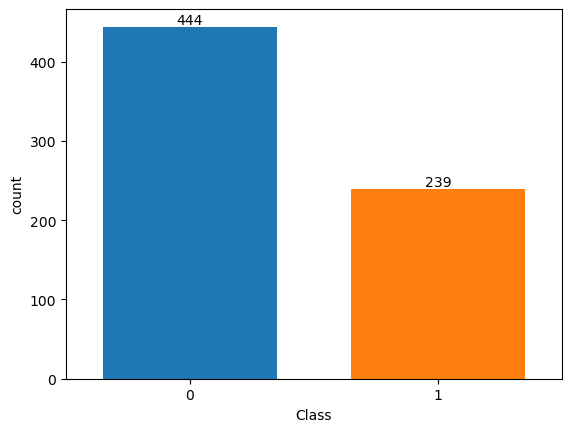

In [5]:
plt.xlabel('Class')
plt.ylabel('count')
b=sns.countplot(x=df['Class'],data=df,width=0.7, saturation=1)
for bx in b.containers:
    b.bar_label(bx)

From the graph above, we can see that 444 women has benign and 239 women has malignant. Now we want to see further

From the graphs, We can see that the higher the Clump thickness, Uniform Cell Size, and the other, the more a woman can risk breast cancer. Let's see another graphs

#### Split the data

In [7]:
X=df.drop('Class',axis=1)
y=df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 68)

#### Now we create trained ML Model

In [8]:
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In this case, the clf variable is trained on the training data (X_train, y_train) and the predict function is used to make predictions on the test data (X_test) and the output is stored in y_hat variable.

In [9]:
y_hat = clf.predict(X_test)

In the line con_mat = confusion_matrix(y_test, y_hat), the confusion_matrix() function is used to generate a confusion matrix, which is a table that is used to define the performance of a classification algorithm. The function takes in 2 parameters, y_test and y_hat which are true target values and predicted values respectively.

The con_mat variable will store the confusion matrix that is generated by comparing the true target values (y_test) with the predicted values (y_hat) and it will be a 2X2 matrix for binary classification problem.

In [10]:
con_mat = confusion_matrix(y_test, y_hat)
con_mat

array([[181,   6],
       [  3,  84]], dtype=int64)

#### Kross Validation

In [11]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

In [12]:
print("accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.mean()*100))

accuracy : 97.07 %
Standard Deviation: 97.07


#### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg=LinearRegression()

In [15]:
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
reg.predict(X_test)

array([-0.03953737,  0.80163248, -0.05273234, -0.0052895 , -0.03953737,
        0.00620575,  0.01940072,  0.78993659,  1.41595001,  0.80133262,
        0.9851059 , -0.01666581,  0.08146329,  0.83222338,  0.87588203,
        0.01940072,  0.09153377,  0.76512253, -0.00347084, -0.05273234,
        0.05891787,  0.2627355 , -0.00347084,  0.5520676 ,  1.39254709,
        0.06866221, -0.03953737,  0.03259568,  0.00813569, -0.0659273 ,
        0.09106509,  0.05546724,  1.02258934,  0.09153377,  0.17107325,
        0.06456245, -0.05117009,  1.02080293,  1.18229632, -0.0659273 ,
       -0.0659273 ,  0.05546724, -0.0659273 , -0.05103262,  0.61371189,
       -0.0246156 , -0.03953737,  1.075465  ,  1.21689671,  1.03156296,
       -0.03953737,  0.05303544,  0.50924396,  0.13275064,  1.03394596,
        0.04227227,  0.01940072,  1.14845443,  0.13942318,  0.8699411 ,
        0.00620575,  1.30438454,  0.05376752,  0.0783388 ,  0.73868202,
        0.10291008, -0.06422758,  1.25096577,  1.26479964,  0.00

In [17]:
reg.score(X_test,y_test)*100

82.17578378526406

#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
lr.predict(X_train)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [22]:
lr.score(X_test,y_test)*100

95.98540145985402

#### Logistic Regression Plot

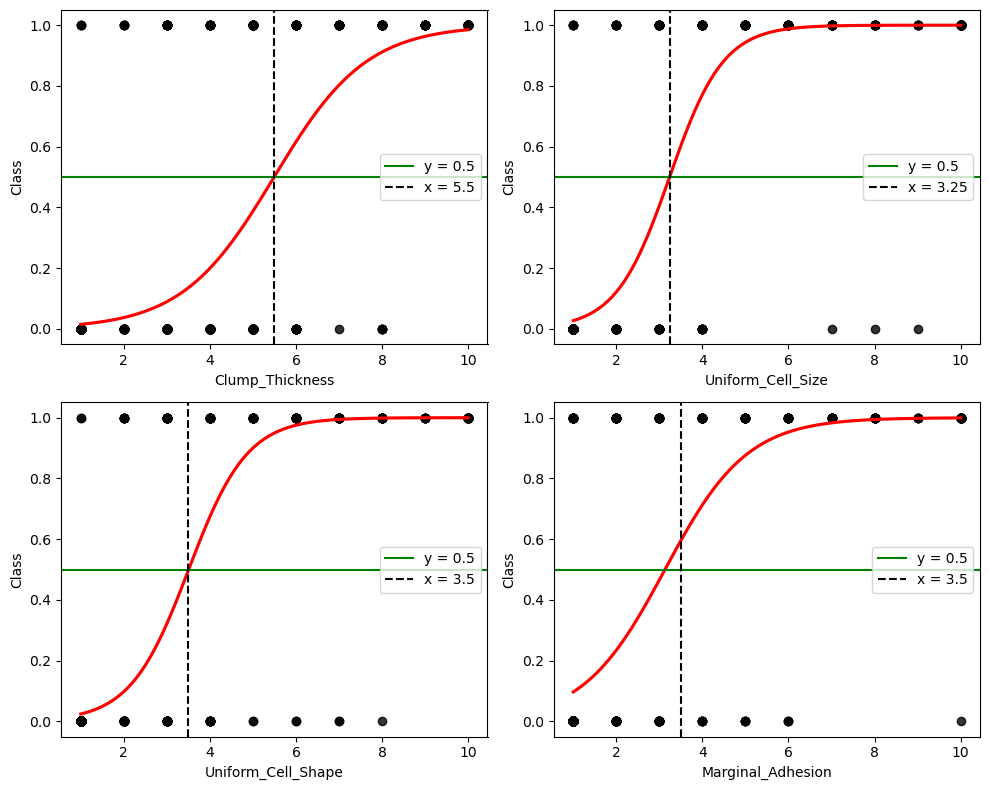

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.regplot(x='Clump_Thickness', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[0,0])
axs[0,0].axhline(.5, color="green", label="y = 0.5")
axs[0,0].axvline(5.5, color="black", ls='--',label='x = 5.5')
axs[0,0].legend(loc='center right')

sns.regplot(x='Uniform_Cell_Size', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[0,1])
axs[0,1].axhline(.5, color="green", label="y = 0.5")
axs[0,1].axvline(3.25, color="black", ls='--', label='x = 3.25')
axs[0,1].legend(loc='center right')

sns.regplot(x='Uniform_Cell_Shape', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[1,0])
axs[1,0].axhline(.5, color="green", label="y = 0.5")
axs[1,0].axvline(3.5, color="black", ls='--', label='x = 3.5')
axs[1,0].legend(loc='center right')

sns.regplot(x='Marginal_Adhesion', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[1,1])
axs[1,1].axhline(.5, color="green", label="y = 0.5")
axs[1,1].axvline(3.5, color="black", ls='--', label='x = 3.5')
axs[1,1].legend(loc='center right')

plt.tight_layout()

plt.show()

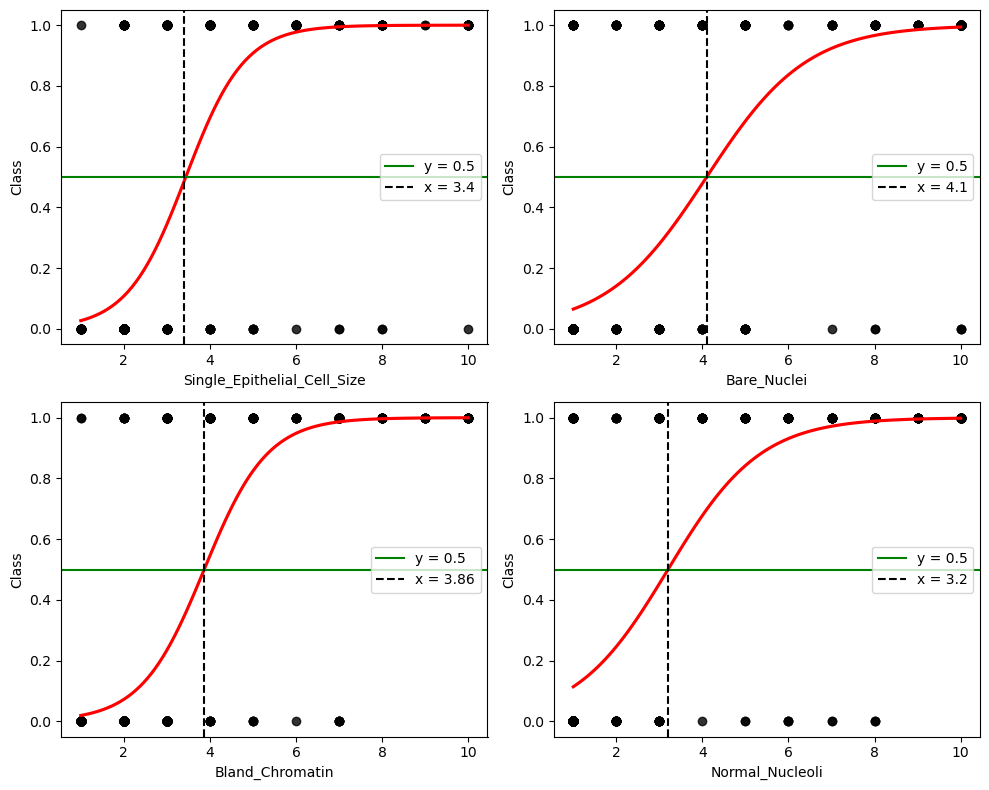

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.regplot(x='Single_Epithelial_Cell_Size', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[0,0])
axs[0,0].axhline(.5, color="green", label="y = 0.5")
axs[0,0].axvline(3.4, color="black", ls='--', label='x = 3.4')
axs[0,0].legend(loc='center right')

sns.regplot(x='Bare_Nuclei', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[0,1])
axs[0,1].axhline(.5, color="green", label="y = 0.5")
axs[0,1].axvline(4.1, color="black", ls='--', label='x = 4.1')
axs[0,1].legend(loc='center right')


sns.regplot(x='Bland_Chromatin', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[1,0])
axs[1,0].axhline(.5, color="green", label="y = 0.5")
axs[1,0].axvline(3.86, color="black", ls='--', label='x = 3.86')
axs[1,0].legend(loc='center right')

sns.regplot(x='Normal_Nucleoli', y='Class', data=df, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, ax=axs[1,1])
axs[1,1].axhline(.5, color="green", label="y = 0.5")
axs[1,1].axvline(3.2, color="black", ls='--', label='x = 3.2')
axs[1,1].legend(loc='center right')

plt.tight_layout()

plt.show()